In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:

df = pd.read_csv('Iris.csv').drop("Id", axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape


(150, 5)

In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


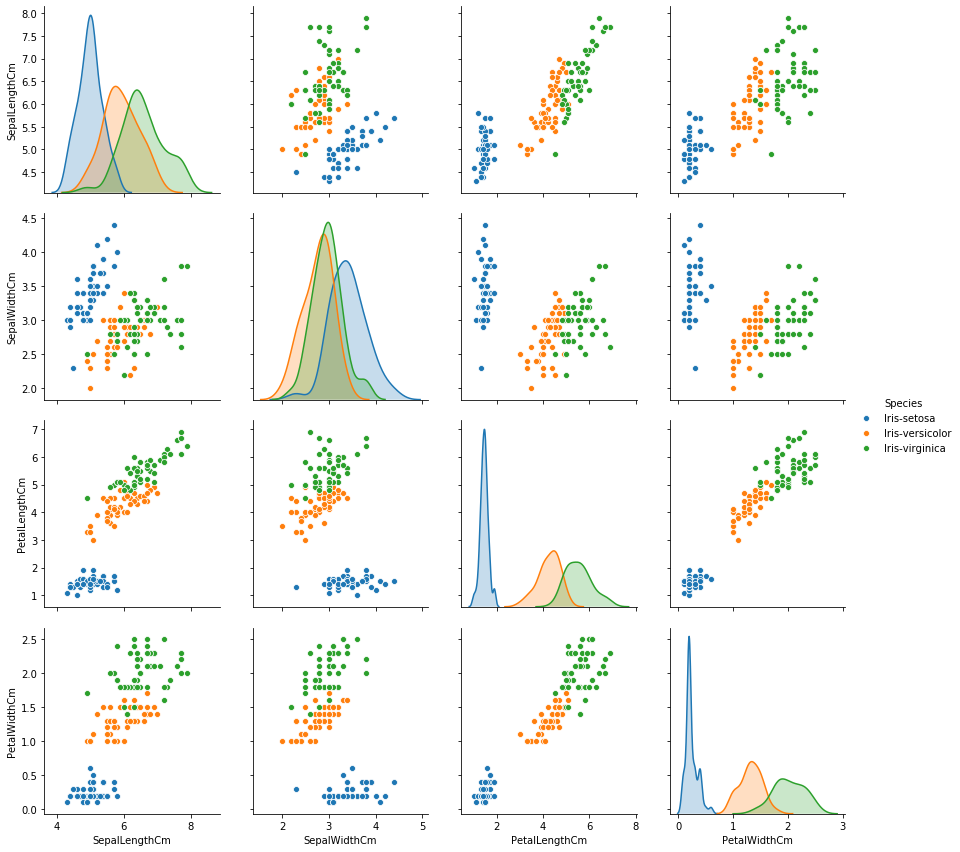

In [6]:
sns.pairplot(df, hue="Species", size=3, diag_kind="kde");


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019BA1E27048>,
      dtype=object)

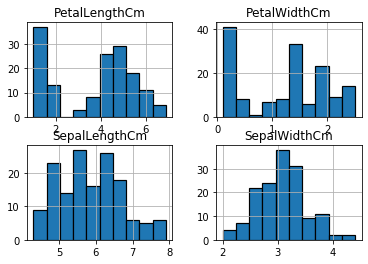

In [7]:
df.hist(edgecolor='black', linewidth=1.2)


C:\Users\LENOVO\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


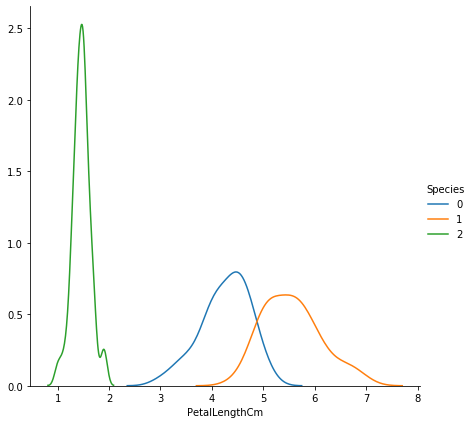

In [19]:
sns.FacetGrid(df, hue="Species", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()


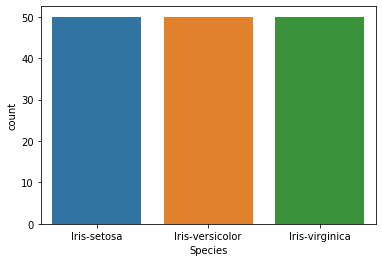

In [8]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Species',data=df)
#ax.set_title('Iris Species Count')
plt.show()

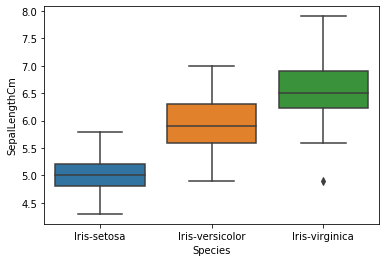

In [9]:
sns.boxplot(x="Species",y="SepalLengthCm",data=df)

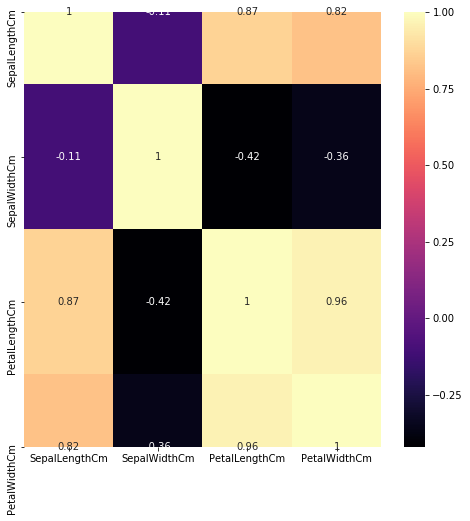

In [10]:
plt.figure(figsize=(8,8)) 
sns.heatmap(df.corr(),annot=True,cmap="magma") #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [11]:
df = df.replace(['Iris-versicolor','Iris-virginica','Iris-setosa'],[0, 1, 2])
X = df.drop("Species",axis=1)
y  = df["Species"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
# Import the models from sklearn
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

objects = ('Multi-NB', 'DTs', 'AdaBoost', 'KNN', 'RF')

In [14]:
A = MultinomialNB(alpha=1.0,fit_prior=True)
B = DecisionTreeClassifier(random_state=42)
C = AdaBoostClassifier(n_estimators=100)
D = KNeighborsClassifier(n_neighbors=3)
E = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [15]:
# function to train classifier
def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)

# function to predict features 
def predict_labels(clf, features):
    return (clf.predict(features))

In [16]:
from sklearn.metrics import accuracy_score
clf = [A,B,C,D,E]
pred_val = [0,0,0,0,0]

for a in range(0,5):
    train_classifier(clf[a], X_train, y_train)
    y_pred = predict_labels(clf[a],X_test)
    pred_val[a] =accuracy_score(y_test, y_pred) 
    print("--"*50)
    print(pred_val[a])
    from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))

----------------------------------------------------------------------------------------------------
0.96
[[15  0  0]
 [ 2 14  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        19

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50

0.96
----------------------------------------------------------------------------------------------------
0.98
[[15  0  0]
 [ 1 15  0]
 [ 0  0 19]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        19

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
we

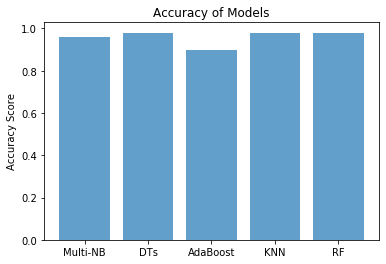

In [17]:
y_pos = np.arange(len(objects))
y_val = [ x for x in pred_val]
plt.bar(y_pos,y_val, align='center', alpha=0.7)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Models')
plt.show()